In [79]:
import pandas as pd
import seaborn as sns

In [47]:
#Reading the data
df=pd.read_json('https://data.nasa.gov/resource/y77d-th95.json')
df.head(1)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01T00:00:00.000,50.775,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN


In [48]:
#Dropping the columns with majority null values
df.drop(columns=[':@computed_region_cbhk_fwbd',':@computed_region_nnqa_25f4'],axis=1,inplace=True)

In [49]:
#Extracting coordinates from the geological column
crd_1 = []
crd_2 = []
for dict_ in df['geolocation']:
    if type(dict_)==dict:
        crd_1.append(dict_['coordinates'][0])
        crd_2.append(dict_['coordinates'][1])
    else:
        crd_1.append(dict_)
        crd_2.append(dict_)

df['coordinate_1'] = crd_1
df['coordinate_2'] = crd_2

In [50]:
df.drop(columns=['geolocation'],axis=1,inplace=True)

In [51]:
print(df.nametype.value_counts())
print(df.fall.value_counts())

Valid    1000
Name: nametype, dtype: int64
Fell     996
Found      4
Name: fall, dtype: int64


In [52]:
#As the nametype column has only 1 feature and the fall column also has highly imbalanced data (around 96%) so we can drop both column
df.drop(columns=['nametype','fall'],axis=1,inplace=True)

In [53]:
#converting the year column into year format
df['year']=df['year'].apply(lambda x:str(x)[:10])

In [54]:
df['year']=pd.to_datetime(df['year'],errors='ignore')

In [74]:
df.drop(df[df['year']=='nan'].index,inplace=True)

In [55]:
df['mass'].fillna(df['mass'].median(),inplace=True)
df['reclat'].fillna(df['reclat'].median(),inplace=True)
df['reclong'].fillna(df['reclong'].median(),inplace=True)
df['coordinate_1'].fillna(df['coordinate_1'].median(),inplace=True)
df['coordinate_2'].fillna(df['coordinate_2'].median(),inplace=True)

In [76]:
df['year'] = df['year'].str.split('-').apply(lambda x:int(x[0]))

In [108]:
df

,name,id,recclass,mass,year,reclat,reclong,coordinate_1,coordinate_2
0,Aachen,1,L5,21.0,1880,50.77500,6.08333,6.08333,50.77500
1,Aarhus,2,H6,720.0,1951,56.18333,10.23333,10.23333,56.18333
2,Abee,6,EH4,107000.0,1952,54.21667,-113.00000,-113.00000,54.21667
3,Acapulco,10,Acapulcoite,1914.0,1976,16.88333,-99.90000,-99.90000,16.88333
4,Achiras,370,L6,780.0,1902,-33.16667,-64.95000,-64.95000,-33.16667
...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,H6,230.0,1934,13.63333,79.41667,79.41667,13.63333
996,Tissint,54823,Martian (shergottite),7000.0,2011,29.48195,-7.61123,-7.61123,29.48195
997,Tjabe,24011,H6,20000.0,1869,-7.08333,111.53333,111.53333,-7.08333
998,Tjerebon,24012,L5,16500.0,1922,-6.66667,106.58333,106.58333,-6.66667


<Axes: xlabel='name', ylabel='year'>

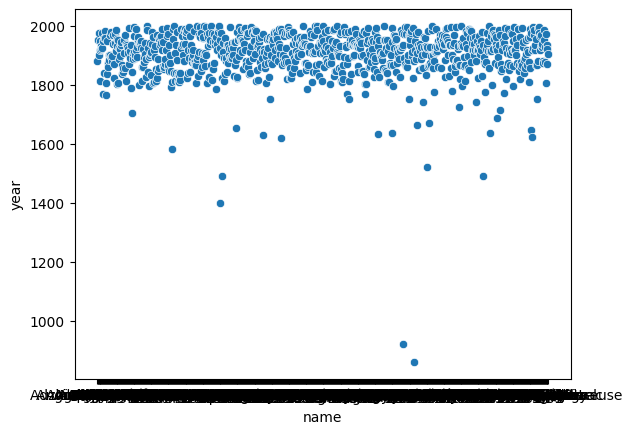

In [111]:
df_filtered = df[df['year'] < 2000]  # Filter the DataFrame based on the condition

sns.scatterplot(x=df_filtered['name'], y=df_filtered['year'])

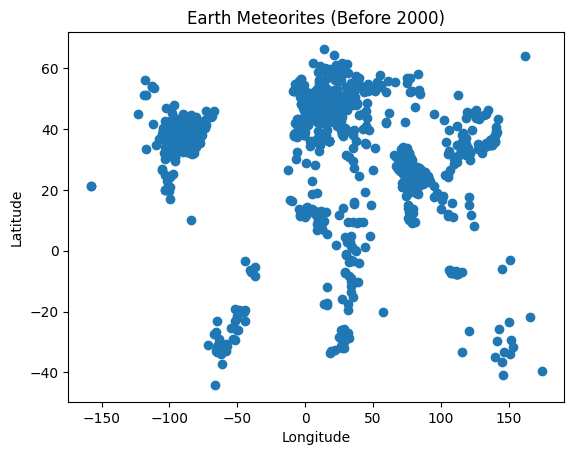

In [112]:
import matplotlib.pyplot as plt

earth_meteorites_before_2000 = df[(df['year'] < 2000)]

plt.scatter(earth_meteorites_before_2000['reclong'], earth_meteorites_before_2000['reclat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Earth Meteorites (Before 2000)')
plt.show()


In [113]:
pd.read_csv('https://data.wa.gov/api/views/f6w7-q2d2/rows.csv')

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10
